This is the EDA notebook for Springboard Capstone 3.

First, I load the necessary libraries.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Then, I import the posts and comments data from the previous notebook.

In [28]:
posts = pd.read_csv('posts.csv',index_col=0)
comments = pd.read_csv('comments.csv',index_col=0)

C:\Users\nickj\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


First, I will visualize the most prominent stocks mentioned on r/wallstreetbets between September 2020 and March 2021. The following code does this.

In [3]:
stocks = posts['stock'].to_list()
stocks_set = set()
for i in range(len(stocks)):
    s = stocks[i].split('|')
    for j in range(len(s)):
        stocks_set.add(s[j])
    #print(stocks_set)

In [4]:
stocksdict = {}

for i, row in posts.iterrows():
    stocks = row['stock'].split('|')
    
    for stk in stocks_set:
        if stk in stocks:
            try:
                stocksdict[stk] += 1
            except:
                stocksdict[stk] = 1
    #print(i)

In [5]:
stocksdict = sorted(stocksdict.items(), key = lambda x: x[1], reverse=True)

C:\Users\nickj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


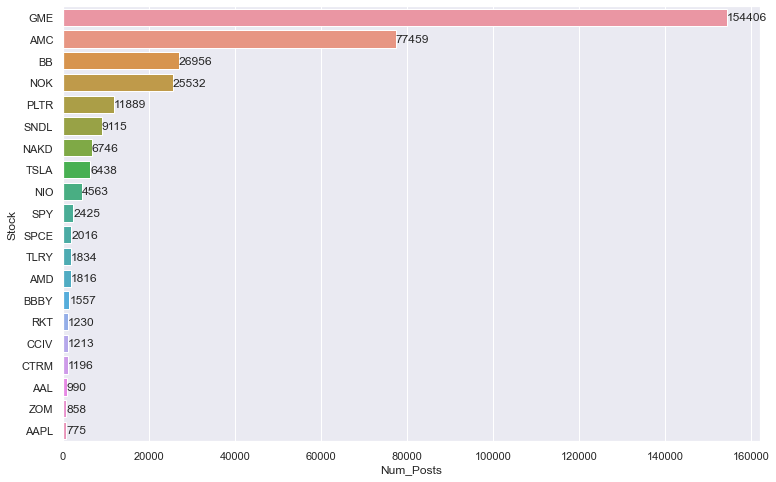

In [7]:
x = [stocksdict[i][0] for i in range(len(stocksdict[:20]))]
y = [stocksdict[i][1] for i in range(len(stocksdict[:20]))]

sns.set(rc={'figure.figsize':(12.5,8)})

stx = sns.barplot(y,x)

stx.set(xlabel='Num_Posts',ylabel='Stock')

for p in stx.patches:
    _x = p.get_x() + p.get_width() + 0.4
    _y = p.get_y() + p.get_height() - 0.25
    value = int(p.get_width())
    stx.text(_x, _y, value, ha="left")

As seen above, GME has significantly more mentions than any other stock.

Now, I plot the number of comments replying to a post against the fraction of overall posts on a logarithmic scale. This is the typical graphical method to observe whether something follows power law behavior. Since the relationship is largely linear, the distribution of the size of posts approximately follows a power law.

In [49]:
posts_dist = posts[posts['num_comments_true'] > 0]['num_comments_true'].value_counts()

In [50]:
posts_dist

1.0       44835
2.0       12853
3.0        8288
4.0        6404
5.0        5180
          ...  
1551.0        1
781.0         1
2595.0        1
2081.0        1
4492.0        1
Name: num_comments_true, Length: 1237, dtype: int64

In [51]:
posts_dist = sorted(posts_dist.items(),key=lambda x: x[0])

In [52]:
total = len(posts[posts['num_comments_true'] > 0])

In [53]:
posts_dist = [(v[0],v[1]/total) for v in posts_dist]

Text(0, 0.5, 'Fraction of posts')

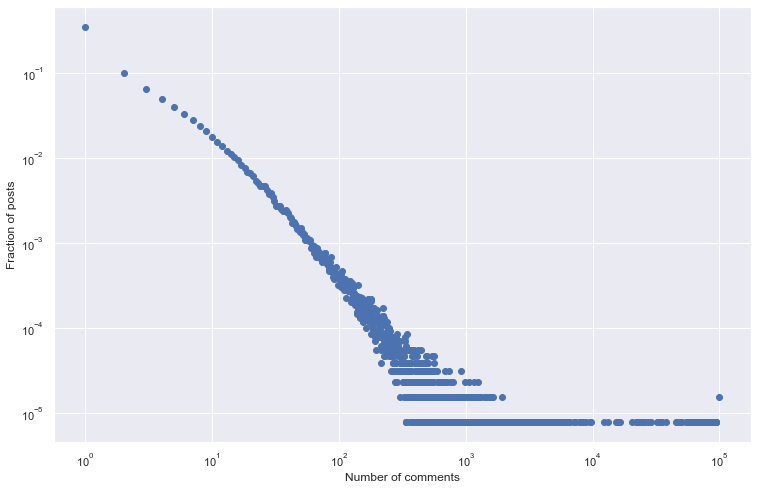

In [57]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

scattr = plt.scatter([v[0] for v in posts_dist],[v[1] for v in posts_dist])
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('Number of comments')
plt.ylabel('Fraction of posts')

Here, I used the dictionary of stocks and counts I created earlier to observe the most popular stocks. I aggregate the data by date, and plot the amount of activity relating to the top 3 stocks together, with date on the x axis. As can be seen, they follow similar trajectories, all achieving their peak at the same time. By this point, the three stocks had a lot of simultaneous mentions. This will be evaluated more concretely further below.

In [60]:
stocksdict

[('GME', 154406),
 ('AMC', 77459),
 ('BB', 26956),
 ('NOK', 25532),
 ('PLTR', 11889),
 ('SNDL', 9115),
 ('NAKD', 6746),
 ('TSLA', 6438),
 ('NIO', 4563),
 ('SPY', 2425),
 ('SPCE', 2016),
 ('TLRY', 1834),
 ('AMD', 1816),
 ('BBBY', 1557),
 ('RKT', 1230),
 ('CCIV', 1213),
 ('CTRM', 1196),
 ('AAL', 990),
 ('ZOM', 858),
 ('AAPL', 775),
 ('NKLA', 754),
 ('OCGN', 717),
 ('FUBO', 710),
 ('GNUS', 634),
 ('SOS', 593),
 ('AG', 573),
 ('B', 567),
 ('EXPR', 535),
 ('CRSR', 532),
 ('FORD', 454),
 ('BABA', 429),
 ('ACB', 421),
 ('IDEX', 417),
 ('BNGO', 391),
 ('KOSS', 379),
 ('PI', 348),
 ('MVIS', 347),
 ('QS', 344),
 ('XSPA', 343),
 ('JAGX', 335),
 ('CLOV', 335),
 ('INO', 334),
 ('ATOS', 323),
 ('GE', 314),
 ('GEVO', 310),
 ('SENS', 307),
 ('UWMC', 306),
 ('WKHS', 303),
 ('AMZN', 298),
 ('SRNE', 297),
 ('MAC', 295),
 ('MT', 295),
 ('CCL', 291),
 ('NAK', 283),
 ('OGI', 271),
 ('VXRT', 266),
 ('VALE', 259),
 ('FB', 255),
 ('PSTH', 252),
 ('TRX', 252),
 ('GM', 244),
 ('NNDM', 244),
 ('PFE', 242),
 ('GSA

In [88]:
memestocks = ['GME','AMC','BB','NOK','PLTR','SNDL','NAKD','TSLA','NIO','SPY','SPCE','TLRY','AMD','BBBY','CCIV','CTRM']

In [32]:
posts['date'] = pd.to_datetime(posts['created_utc'],errors='coerce',unit='s').dt.strftime("%Y-%m-%d")

In [33]:
posts = posts.sort_values('created_utc')

In [34]:
dates = sorted(posts['date'].unique())

In [63]:
stocks_dates = posts[['stock','date']]

In [64]:
stocks_dates.head()

,stock,date
id,,
ikazok,AMZN,2020-09-01
ikb0s0,TSLA,2020-09-01
ikb1nt,INSG,2020-09-01
ikb2ll,TSLA,2020-09-01
ikb8aw,SPY,2020-09-01


([<matplotlib.axis.XTick at 0x1d49a8d6fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

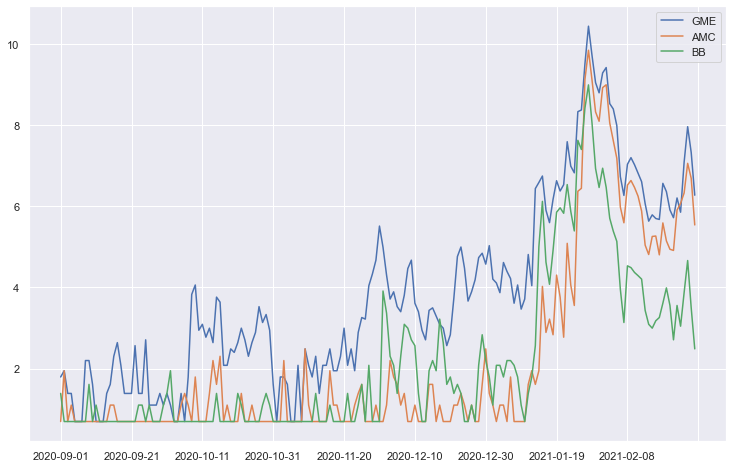

In [132]:
for stock in memestocks[0:3]:
    currentdates = stocks_dates[stocks_dates['stock'].str.contains(stock)]
    currentgroup = currentdates.date.value_counts()
    datesdict = {}

    for date in dates:
        if date in currentgroup.index:
            datesdict[date] = currentgroup[date]
        else:
            datesdict[date] = 1
    
    x = [k[0] for k in datesdict.items()]
    y = [k[1]+1 for k in datesdict.items()]
    
    plt.plot(x[:-1],np.log(y[:-1]))
plt.legend(["GME", "AMC", "BB"])
plt.xticks(np.arange(0, len(datesdict), step=20))

Here is a plot of the next three stocks. Note that NOK and SNDL also have the same peak date as the top 3 stocks, yet PLTR follows its own trajectory. While some stocks feed off one another's 'meme' status, others are sustained independently.

([<matplotlib.axis.XTick at 0x1d49ac3a0a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

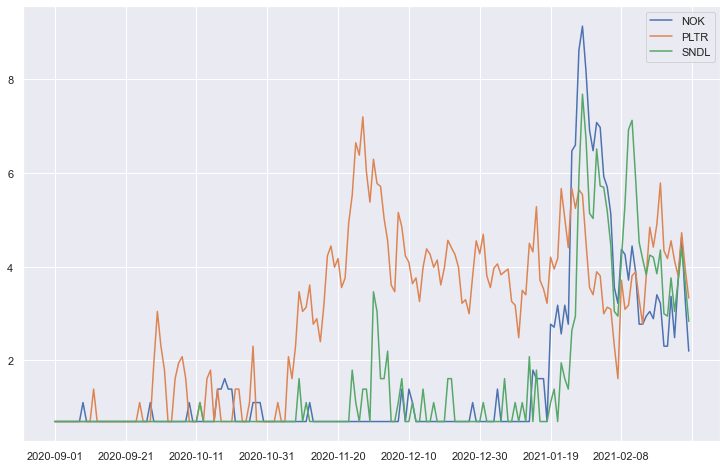

In [133]:
for stock in memestocks[3:6]:
    currentdates = stocks_dates[stocks_dates['stock'].str.contains(stock)]
    currentgroup = currentdates.date.value_counts()
    datesdict = {}

    for date in dates:
        if date in currentgroup.index:
            datesdict[date] = currentgroup[date]
        else:
            datesdict[date] = 1
    
    x = [k[0] for k in datesdict.items()]
    y = [k[1]+1 for k in datesdict.items()]
    
    plt.plot(x[:-1],np.log(y[:-1]))
plt.legend(["NOK", "PLTR", "SNDL"])
plt.xticks(np.arange(0, len(datesdict), step=20))

Finally, the code below displays a heatmap of correlations between the most mentioned stocks.

In [76]:
dates = sorted(posts['date'].unique())

In [79]:
datesdict = {}

for date in dates:
    if date in gme_group.index:
        datesdict[date] = gme_group[date]
    else:
        datesdict[date] = 0

In [105]:
for stock in memestocks[1:]:
    currentdates = stocks_dates[stocks_dates['stock'].str.contains(stock)]
    currentgroup = currentdates.date.value_counts()
    datesdict = {}

    for date in dates:
        if date in currentgroup.index:
            datesdict[date] = currentgroup[date]
        else:
            datesdict[date] = 1
    
    y = [k[1]+1 for k in datesdict.items()]
    print(stock)
    print(stats.pearsonr(y_gme,y)[0])
    

AMC
0.9879907742640647
BB
0.9277215082336614
NOK
0.9338200454091233
PLTR
0.12424562061228428
SNDL
0.7993621917898746
NAKD
0.9326810442573249
TSLA
0.4585930145825339
NIO
0.44831971221988903
SPY
0.336067474646762
SPCE
0.9138977702124079
TLRY
0.12132954443224035
AMD
0.8878811669177624
BBBY
0.9373142136276148
CCIV
0.48079721068099707
CTRM
0.8452307817266567


In [106]:
stocks_list = []

for stock in memestocks:
    currentdates = stocks_dates[stocks_dates['stock'].str.contains(stock)]
    currentgroup = currentdates.date.value_counts()
    datesdict = {}

    for date in dates:
        if date in currentgroup.index:
            datesdict[date] = currentgroup[date]
        else:
            datesdict[date] = 1
    
    y = [k[1]+1 for k in datesdict.items()]
    stocks_list.append(y)
    

In [114]:
vals = pd.DataFrame(stocks_list,index=memestocks)

In [115]:
vals.head()

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
GME,6,7,4,4,2,2,2,9,9,5,...,580,369,305,496,349,1197,2876,1522,531,109
AMC,2,7,2,3,2,2,2,2,2,2,...,172,140,136,368,434,561,1165,805,255,45
BB,4,2,2,2,2,2,2,2,5,2,...,54,35,15,35,21,48,106,33,12,10
NOK,2,2,2,2,2,2,2,2,3,2,...,25,10,10,29,12,41,103,27,9,2
PLTR,2,2,2,2,2,2,2,2,2,2,...,327,77,65,95,62,45,113,52,28,8


<AxesSubplot:>

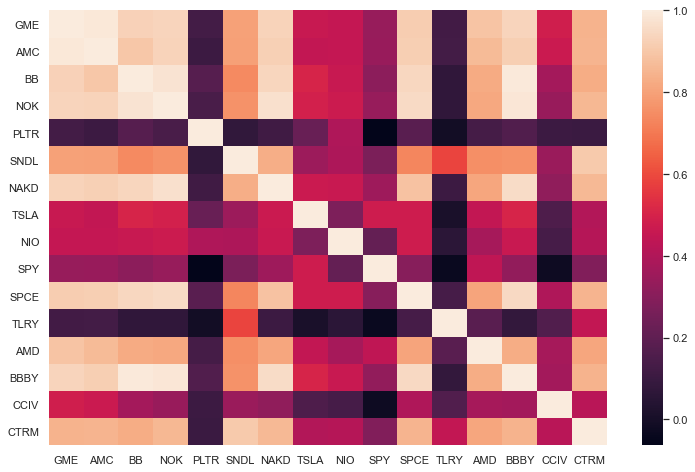

In [116]:
sns.heatmap(vals.transpose().corr())

The heatmap confirms the high correlation between the top three stocks, in addition to a large number of the other top stocks. Most of these stocks peaked in the stock market when GME did, which in turn indicates the high correlation between r/wallstreetbets activity and the market itself for certain stocks.

The next notebook will focus on preprocessing the data for modeling, specifically getting it into graph form using networkx.